#Análisis de Violencia intrafamiliar en Colombia
Esta es una recopilación de los datos sobre violencia intrafamiliar que se han venido desarrollando en Colombia a lo largo del tiempo.
Tenemos el dataset con los años 2010 al 2021.


**Nota** El raw_data esta actualizado pero se deben haccer unos cambios en el nombre


##Preguntas
*   ¿Cuales son los municipio con mas casos de violencia domestica?

*   ¿Cuales son los departamentos con mas casos de violencia domestica?

*   ¿Cuales son las armas o medios mas usados?

*   ¿Historial de casos por años?

*   ¿Victimas por genero?

##Columnas del dataset
*   Departamentos: que son divisiones políticas y administrativas que conforman el territorio nacional.

*   Municipios: Que corresponden al segundo nivel de división administrativa en Colombia.

*   Código DANE: Es una nomenclatura estandarizada, diseñada por el DANE para la identificación de Entidades Territoriales (departamentos, distritos y municipios), Áreas No Municipalizadas y Centros Poblados, mediante la asignación de un código numérico único a cada una de estas unidades territoriales.

*   Medio Armado: Que es una asignación de los elementos que se utilizaron para cometer el hecho violento.

*   Fecha de realización: Que describe el día en que ocurrió el hecho violento.
*   Sexo: Sexo de la víctima.
*   Cantidad: Número de personas que han resultado heridas.


##Importamos las librerias

In [1]:
#Procesamiento
import pandas as pd
import numpy as np
import os
import datetime as dt

#Manejo de valores núlos
import missingno as msno

#Visualización
import matplotlib.pyplot as plt
import seaborn as sns

Cargamos el dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Cargamos el path del los archivos en la variable ruta
ruta = '/content/drive/MyDrive/AnalisisDatos/'
#Listamos los archivos que tenemos en la carpeta files
os.listdir(ruta)

['files',
 'Carpeta sin título',
 'ViolenciaIntrafamiliar.csv',
 'raw_data.csv',
 'ViolenciaIntrafamiliar.ipynb',
 'obesity.csv',
 'Ventas.ipynb',
 'Obesity.ipynb']

In [4]:
df = pd.read_csv(ruta+'/ViolenciaIntrafamiliar.csv')
df.head()

<ipython-input-4-e29550685ac6>:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(ruta+'/ViolenciaIntrafamiliar.csv')


,DEPARTAMENTO,MUNICIPIO,CODIGO DANE,ARMAS MEDIOS,FECHA HECHO,GENERO,GRUPO ETARIO,CANTIDAD
0,ATLÁNTICO,BARRANQUILLA (CT),8001000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,MASCULINO,ADULTOS,1
1,BOYACÁ,DUITAMA,15238000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,FEMENINO,ADULTOS,1
2,CAQUETÁ,PUERTO RICO,18592000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,MASCULINO,ADULTOS,1
3,CASANARE,MANÍ,85139000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,FEMENINO,ADULTOS,1
4,CUNDINAMARCA,BOGOTÁ D.C. (CT),11001000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,FEMENINO,ADULTOS,1


In [5]:
df.shape

(476970, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476970 entries, 0 to 476969
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   DEPARTAMENTO  476970 non-null  object
 1   MUNICIPIO     476970 non-null  object
 2   CODIGO DANE   476970 non-null  object
 3   ARMAS MEDIOS  476968 non-null  object
 4   FECHA HECHO   476970 non-null  object
 5   GENERO        476967 non-null  object
 6   GRUPO ETARIO  475355 non-null  object
 7   CANTIDAD      476970 non-null  int64 
dtypes: int64(1), object(7)
memory usage: 29.1+ MB


In [7]:
df.columns

Index(['DEPARTAMENTO', 'MUNICIPIO', 'CODIGO DANE', 'ARMAS MEDIOS',
       'FECHA HECHO', 'GENERO', 'GRUPO ETARIO', 'CANTIDAD'],
      dtype='object')

#1. Limpieza de Datos

Realizaremos el proceso de limpieza teniendo en cuenta las situaciones más comunes:

*   Datos faltantes en algunas celdas.
*   Columnas irrelevantes (que no responden al problema que queremos resolver) y tipo de dato de las columnas
Registros (filas) repetidos.

*   Valores extremos (outliers) en el caso de las variables numéricas. Se deben analizar en detalle pues no necesariamente la solución es eliminarlos

*   Errores tipográficos en el caso de las variables categóricas.

Al final de este proceso de limpieza deberíamos tener un set de datos íntegro, listo para la fase de Análisis Exploratorio.

##1.1.  Datos Faltantes

Valores núlos por columna.

In [8]:
missing_values_count = df.isna().sum().sort_values(ascending = False)
missing_values_count

GRUPO ETARIO    1615
GENERO             3
ARMAS MEDIOS       2
DEPARTAMENTO       0
MUNICIPIO          0
CODIGO DANE        0
FECHA HECHO        0
CANTIDAD           0
dtype: int64

<Axes: >

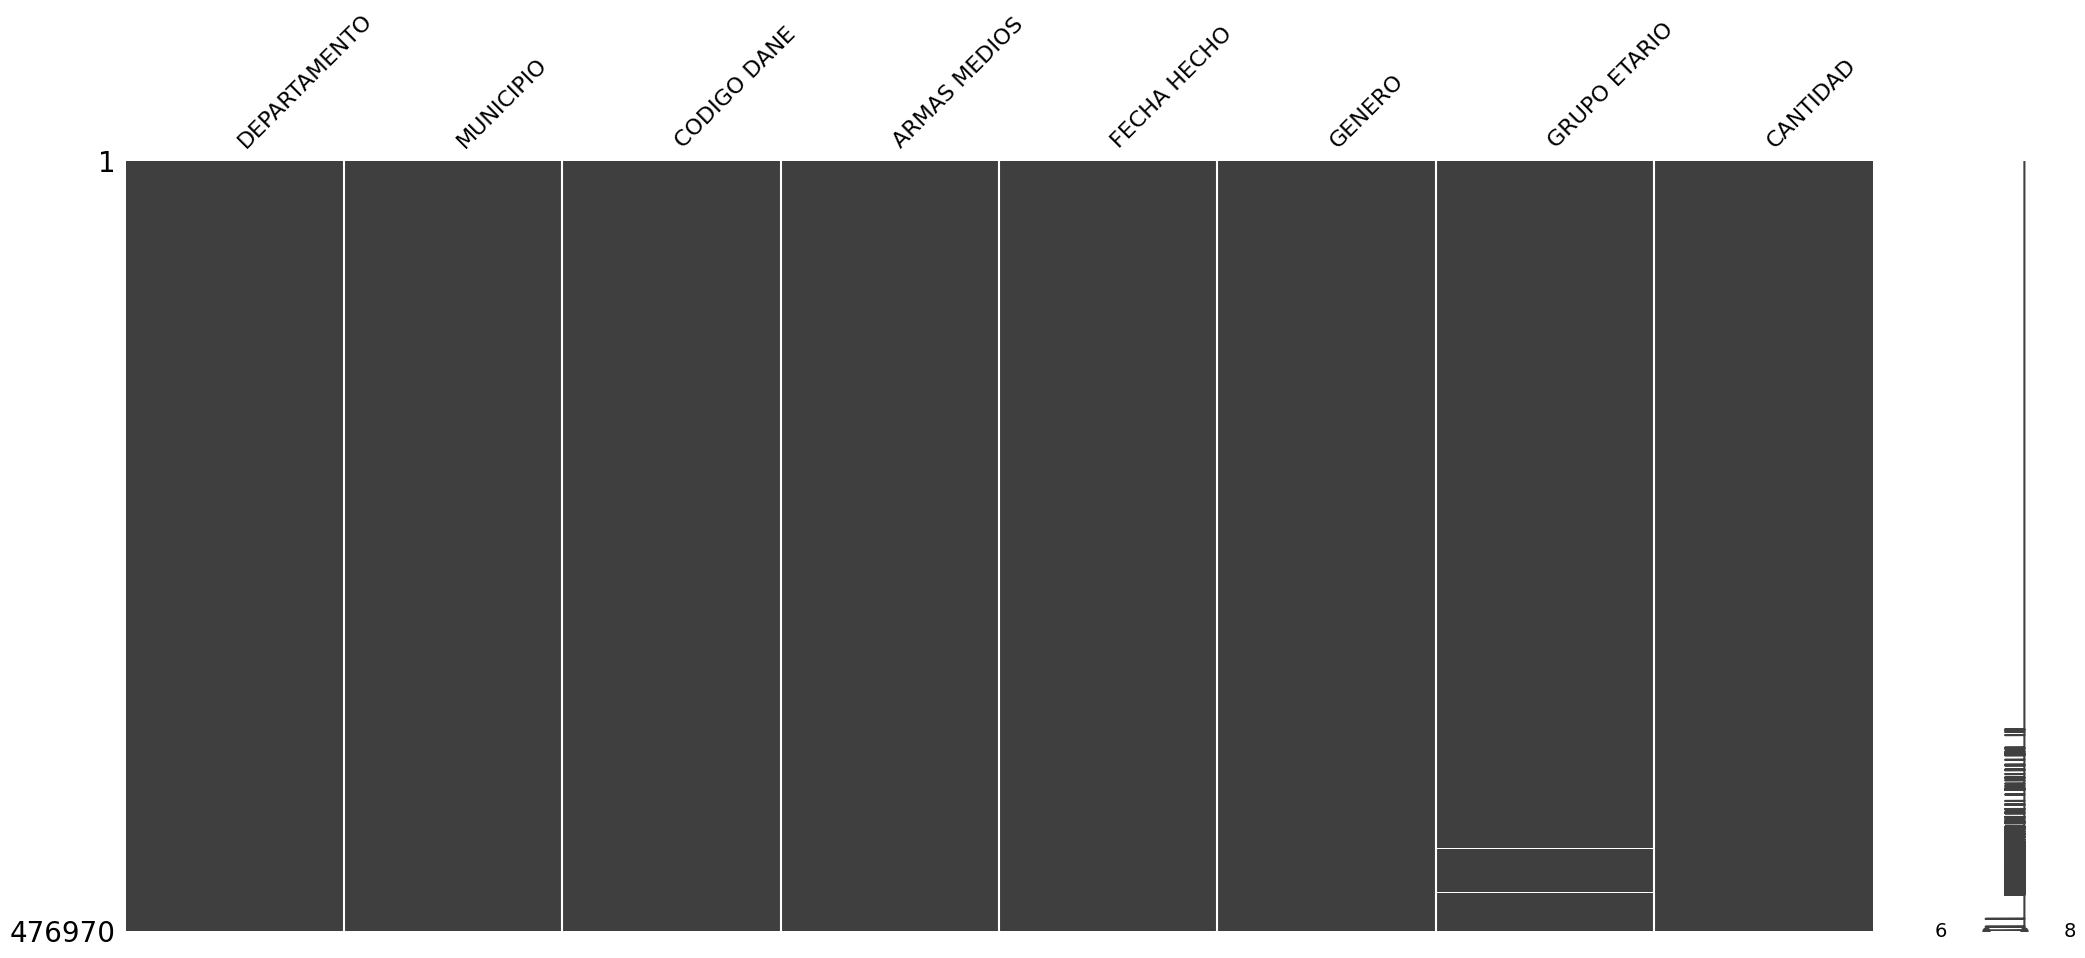

In [9]:
msno.matrix(df)

In [10]:
df['GRUPO ETARIO'].unique()

array(['ADULTOS', 'ADOLESCENTES', 'MENORES', 'NO REPORTA', nan],
      dtype=object)

In [11]:
df['GENERO'].unique()

array(['MASCULINO', 'FEMENINO', 'NO REPORTA', '-', nan], dtype=object)

In [12]:
df['ARMAS MEDIOS'].unique()

array(['ARMA BLANCA / CORTOPUNZANTE', 'ARMA DE FUEGO', 'CONTUNDENTES',
       'CORTANTES', 'CORTOPUNZANTES', 'NO REPORTADO', 'PUNZANTES',
       'SIN EMPLEO DE ARMAS', 'NO REPORTA', 'ESCOPOLAMINA', '-', nan],
      dtype=object)

In [13]:
df['DEPARTAMENTO'].unique()

array(['ATLÁNTICO', 'BOYACÁ', 'CAQUETÁ', 'CASANARE', 'CUNDINAMARCA',
       'SUCRE', 'VALLE', 'HUILA', 'ANTIOQUIA', 'ARAUCA', 'BOLÍVAR',
       'CALDAS', 'CAUCA', 'CESAR', 'CHOCÓ', 'CÓRDOBA', 'MAGDALENA',
       'META', 'NARIÑO', 'NORTE DE SANTANDER', 'PUTUMAYO', 'RISARALDA',
       'SANTANDER', 'TOLIMA', 'VAUPÉS', 'GUAVIARE', 'GUAJIRA', 'QUINDÍO',
       'AMAZONAS', 'VICHADA', 'GUAINÍA', 'SAN ANDRÉS', 'NO REPORTA'],
      dtype=object)

Los datos nulos en la columna GRUPO ETARIO lo cambiamos por NO REPORTA, hacemos lo mismo en las columnas GENERO y ARMAS MEDIOS.

Tambien esta el dato - se remplaza por NO REPORTA.

Tambien esta el dato NO REPORTADO y lo reemplazamos por NO REPORTA.

In [14]:
df['GRUPO ETARIO'].fillna('NO REPORTA', inplace=True)
df['GENERO'].fillna('NO REPORTA', inplace=True)
df['ARMAS MEDIOS'].fillna('NO REPORTA', inplace=True)

In [15]:
missing_values_count = df.isna().sum().sort_values(ascending = False)
missing_values_count

DEPARTAMENTO    0
MUNICIPIO       0
CODIGO DANE     0
ARMAS MEDIOS    0
FECHA HECHO     0
GENERO          0
GRUPO ETARIO    0
CANTIDAD        0
dtype: int64

In [16]:
df['GENERO'] = df['GENERO'].replace({'-':'NO REPORTA'})
df['ARMAS MEDIOS'] = df['ARMAS MEDIOS'].replace({'-':'NO REPORTA', 'NO REPORTADO':'NO REPORTA'})

In [17]:
df['GENERO'].unique()

array(['MASCULINO', 'FEMENINO', 'NO REPORTA'], dtype=object)

In [18]:
df['ARMAS MEDIOS'].unique()

array(['ARMA BLANCA / CORTOPUNZANTE', 'ARMA DE FUEGO', 'CONTUNDENTES',
       'CORTANTES', 'CORTOPUNZANTES', 'NO REPORTA', 'PUNZANTES',
       'SIN EMPLEO DE ARMAS', 'ESCOPOLAMINA'], dtype=object)

##1.2.    Validamos si tenemos registros duplicados.

In [19]:
df[df.duplicated()]

,DEPARTAMENTO,MUNICIPIO,CODIGO DANE,ARMAS MEDIOS,FECHA HECHO,GENERO,GRUPO ETARIO,CANTIDAD
1034,ATLÁNTICO,SOLEDAD,8758000,NO REPORTA,20/01/2010,FEMENINO,ADULTOS,1
2119,SUCRE,SINCELEJO (CT),70001000,NO REPORTA,10/02/2010,FEMENINO,ADULTOS,1
2212,SUCRE,SINCELEJO (CT),70001000,NO REPORTA,12/02/2010,FEMENINO,ADULTOS,1
3794,CUNDINAMARCA,MADRID,25430000,NO REPORTA,17/03/2010,FEMENINO,ADULTOS,1
3795,CUNDINAMARCA,MADRID,25430000,NO REPORTA,17/03/2010,MASCULINO,ADULTOS,1
...,...,...,...,...,...,...,...,...
454530,CUNDINAMARCA,BOGOTÁ D.C. (CT),11001000,CONTUNDENTES,31/12/2020,FEMENINO,ADULTOS,1
454531,CUNDINAMARCA,BOGOTÁ D.C. (CT),11001000,CONTUNDENTES,31/12/2020,MASCULINO,ADULTOS,1
454532,CUNDINAMARCA,BOGOTÁ D.C. (CT),11001000,CONTUNDENTES,31/12/2020,FEMENINO,ADULTOS,1
454534,CUNDINAMARCA,BOGOTÁ D.C. (CT),11001000,SIN EMPLEO DE ARMAS,31/12/2020,FEMENINO,ADULTOS,1


En este caso no tenemos la certeza de que los registros esten duplicado, por lo tantyo dejamos el dataset sin borrar registros

##1.3.    Cambiamos el tipo de la columna FECHA HECHO de object a datatime

In [20]:
df["FECHA HECHO"] = pd.to_datetime(df["FECHA HECHO"], format='%d/%m/%Y', errors="coerce")
df["FECHA HECHO"].min(),df["FECHA HECHO"].max()
# Eliminamos los datos nulos restantes
df = df.dropna()

##1.3.  Columnas irrelevantes

*   En este caso la columna irrelevante es CODIGO DANE

In [21]:
df.drop(columns=['CODIGO DANE'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 476962 entries, 0 to 476961
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   DEPARTAMENTO  476962 non-null  object        
 1   MUNICIPIO     476962 non-null  object        
 2   ARMAS MEDIOS  476962 non-null  object        
 3   FECHA HECHO   476962 non-null  datetime64[ns]
 4   GENERO        476962 non-null  object        
 5   GRUPO ETARIO  476962 non-null  object        
 6   CANTIDAD      476962 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 29.1+ MB


<ipython-input-21-310c36708541>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['CODIGO DANE'], axis=1, inplace=True)


In [22]:
df

,DEPARTAMENTO,MUNICIPIO,ARMAS MEDIOS,FECHA HECHO,GENERO,GRUPO ETARIO,CANTIDAD
0,ATLÁNTICO,BARRANQUILLA (CT),ARMA BLANCA / CORTOPUNZANTE,2010-01-01,MASCULINO,ADULTOS,1
1,BOYACÁ,DUITAMA,ARMA BLANCA / CORTOPUNZANTE,2010-01-01,FEMENINO,ADULTOS,1
2,CAQUETÁ,PUERTO RICO,ARMA BLANCA / CORTOPUNZANTE,2010-01-01,MASCULINO,ADULTOS,1
3,CASANARE,MANÍ,ARMA BLANCA / CORTOPUNZANTE,2010-01-01,FEMENINO,ADULTOS,1
4,CUNDINAMARCA,BOGOTÁ D.C. (CT),ARMA BLANCA / CORTOPUNZANTE,2010-01-01,FEMENINO,ADULTOS,1
...,...,...,...,...,...,...,...
476957,VICHADA,PUERTO CARREÑO (CT),SIN EMPLEO DE ARMAS,2021-01-05,FEMENINO,ADULTOS,1
476958,VICHADA,PUERTO CARREÑO (CT),SIN EMPLEO DE ARMAS,2021-01-14,FEMENINO,ADULTOS,1
476959,VICHADA,PUERTO CARREÑO (CT),SIN EMPLEO DE ARMAS,2021-03-26,FEMENINO,ADULTOS,1
476960,VICHADA,PUERTO CARREÑO (CT),SIN EMPLEO DE ARMAS,2021-03-27,FEMENINO,ADULTOS,1


##2.  ANÁLISIS EXPLORATORIO DE DATOS EDA

###Variables categóricas
Las que no son de tipo numérico
1.  Creamos una función para graficar o analizar todas las variables categóricas a la vez.
2.  Buscamos las cosas extrañas y entendomos los datos con las graficas.
3.  Conclusiones.
4.  Aplicamos las conclusiones o las correcciones.

In [23]:
def graficos_eda_categoricos(cat):
    #Calculamos el número de filas que necesitamos
    from math import ceil
    filas = ceil(cat.shape[1]/2)

    #Defiimos el tipo de gráfico
    f, ax = plt.subplots(nrows=filas, ncols=2, figsize=(16, filas*6))

    #Aplanamos para iterar por el gráfico como si fuera de una dimensión en lugar de 2
    ax=ax.flat

    #Creamos el ciclo que añade al gráfico
    for cada, variable in enumerate(cat):
        cat[variable].value_counts().plot.barh(ax=ax[cada])
        ax[cada].set_title(variable, fontsize=12, fontweight='bold')
        ax[cada].tick_params(labelsize=12)

In [24]:
#graficos_eda_categoricos(df.select_dtypes('O'))

Conclusiones de Variables categóricas
*   Los departamentos con más violecia son Cundicnamarca, Antioquia y Valle.
*   Con lo que más se tiene violencia son con objetos contundentes y sin empleo de armas, algo importante es que la tercera causa es NO REPORTA.
*   El genero má aacado es el femenino.
*   El grupo etario más violento es el ADULTO.

##3. SOLUCIÓN A LAS PREGUNTAS.

*   ¿Cuales son los municipio con mas casos de violencia domestica?


In [25]:
municipios_mas_violentos = df["MUNICIPIO"].value_counts().head(10)
municipios_mas_violentos

MUNICIPIO
BOGOTÁ D.C. (CT)      53792
MEDELLÍN (CT)         22032
CALI (CT)             18958
BUCARAMANGA (CT)      10420
VILLAVICENCIO (CT)     9675
BARRANQUILLA (CT)      8800
PASTO (CT)             8550
CARTAGENA (CT)         8408
CÚCUTA (CT)            8202
IBAGUÉ (CT)            7822
Name: count, dtype: int64

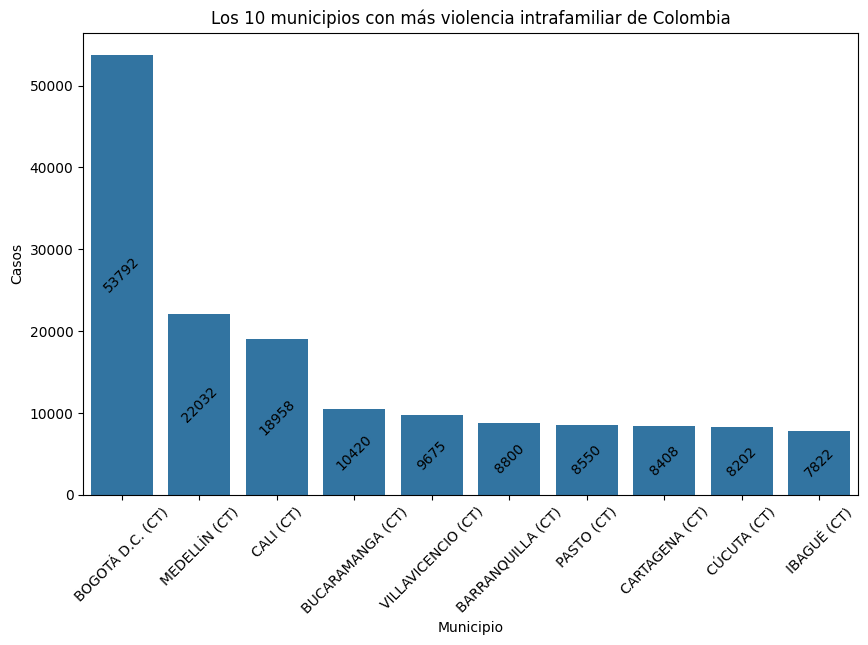

In [26]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x=municipios_mas_violentos.index, y=municipios_mas_violentos.values)
ax.bar_label(ax.containers[0], fmt='%.0f', label_type='center', rotation=45)
plt.xticks(rotation=45)
plt.title("Los 10 municipios con más violencia intrafamiliar de Colombia")
plt.xlabel("Municipio")
plt.ylabel("Casos")
plt.show()

*   ¿Cuales son los departamentos con mas casos de violencia domestica?

In [27]:
departamentos_mas_violentos = df["DEPARTAMENTO"].value_counts().head(10)
departamentos_mas_violentos

DEPARTAMENTO
CUNDINAMARCA    88098
ANTIOQUIA       57288
VALLE           44909
SANTANDER       38493
BOYACÁ          26920
ATLÁNTICO       17516
TOLIMA          17007
HUILA           16547
META            16223
BOLÍVAR         15954
Name: count, dtype: int64

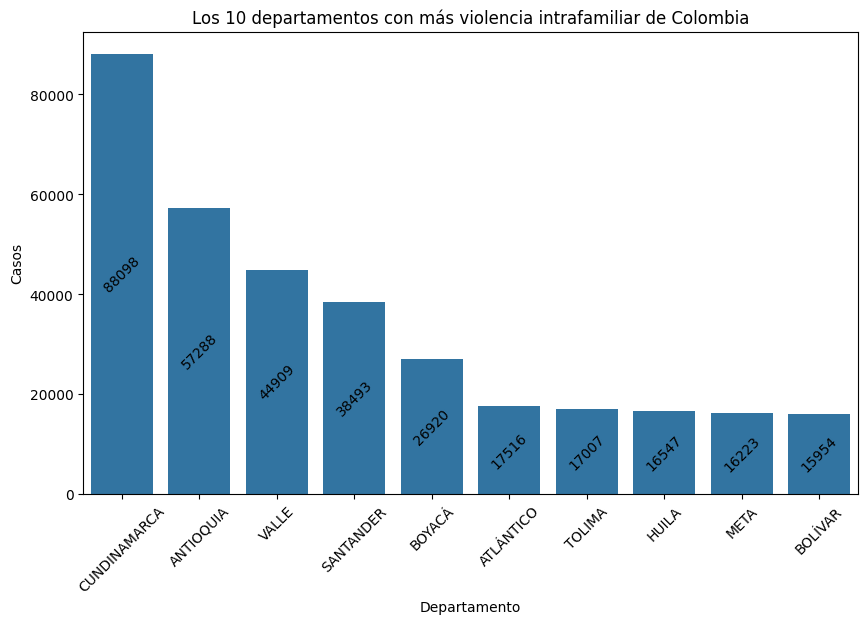

In [28]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x=departamentos_mas_violentos.index, y=departamentos_mas_violentos.values)
ax.bar_label(ax.containers[0], fmt='%.0f', label_type='center', rotation=45)
plt.xticks(rotation=45)
plt.title("Los 10 departamentos con más violencia intrafamiliar de Colombia")
plt.xlabel("Departamento")
plt.ylabel("Casos")
plt.show()

*   ¿Cuales son las armas o medios mas usados?

In [29]:
armas_mas_usadas = df["ARMAS MEDIOS"].value_counts().head(4)
armas_mas_usadas

ARMAS MEDIOS
CONTUNDENTES                   244945
SIN EMPLEO DE ARMAS            108779
NO REPORTA                      76343
ARMA BLANCA / CORTOPUNZANTE     38070
Name: count, dtype: int64

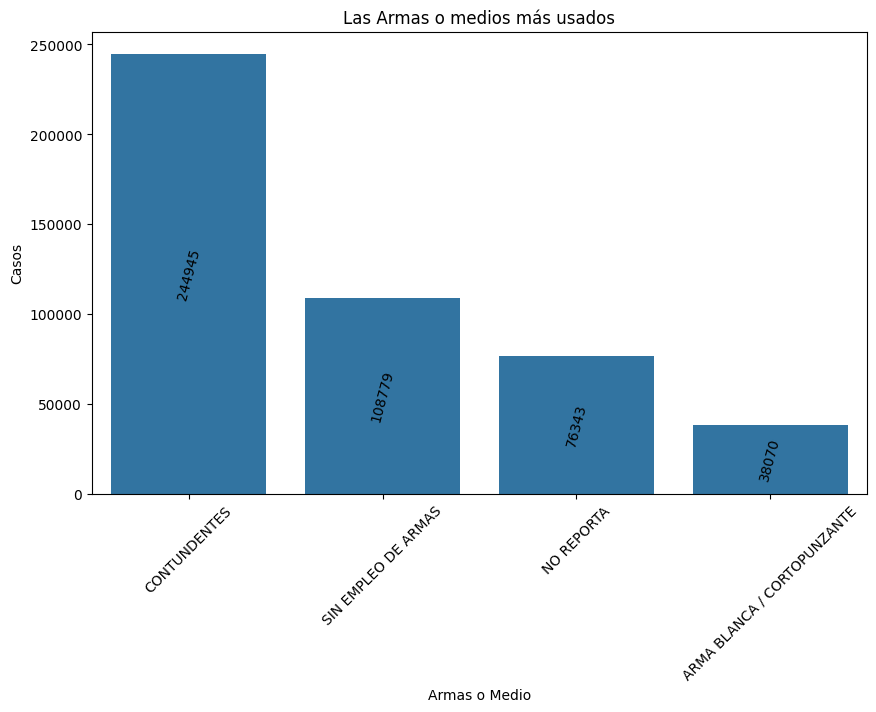

In [30]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x=armas_mas_usadas.index, y=armas_mas_usadas.values)
ax.bar_label(ax.containers[-1], fmt='%.0f', label_type='center', rotation=75)
plt.xticks(rotation=45)
plt.title("Las Armas o medios más usados")
plt.xlabel("Armas o Medio")
plt.ylabel("Casos")
plt.show()

*   ¿Historial de casos por años?

In [31]:
df['Anyo'] = df['FECHA HECHO'].dt.year
df

,DEPARTAMENTO,MUNICIPIO,ARMAS MEDIOS,FECHA HECHO,GENERO,GRUPO ETARIO,CANTIDAD,Anyo
0,ATLÁNTICO,BARRANQUILLA (CT),ARMA BLANCA / CORTOPUNZANTE,2010-01-01,MASCULINO,ADULTOS,1,2010
1,BOYACÁ,DUITAMA,ARMA BLANCA / CORTOPUNZANTE,2010-01-01,FEMENINO,ADULTOS,1,2010
2,CAQUETÁ,PUERTO RICO,ARMA BLANCA / CORTOPUNZANTE,2010-01-01,MASCULINO,ADULTOS,1,2010
3,CASANARE,MANÍ,ARMA BLANCA / CORTOPUNZANTE,2010-01-01,FEMENINO,ADULTOS,1,2010
4,CUNDINAMARCA,BOGOTÁ D.C. (CT),ARMA BLANCA / CORTOPUNZANTE,2010-01-01,FEMENINO,ADULTOS,1,2010
...,...,...,...,...,...,...,...,...
476957,VICHADA,PUERTO CARREÑO (CT),SIN EMPLEO DE ARMAS,2021-01-05,FEMENINO,ADULTOS,1,2021
476958,VICHADA,PUERTO CARREÑO (CT),SIN EMPLEO DE ARMAS,2021-01-14,FEMENINO,ADULTOS,1,2021
476959,VICHADA,PUERTO CARREÑO (CT),SIN EMPLEO DE ARMAS,2021-03-26,FEMENINO,ADULTOS,1,2021
476960,VICHADA,PUERTO CARREÑO (CT),SIN EMPLEO DE ARMAS,2021-03-27,FEMENINO,ADULTOS,1,2021


In [32]:
casos_anyo = df["Anyo"].value_counts()
casos_anyo

Anyo
2020    102616
2019     52924
2017     50620
2016     50055
2018     48098
2015     45181
2014     30045
2021     22416
2013     21982
2012     20602
2011     17163
2010     15260
Name: count, dtype: int64

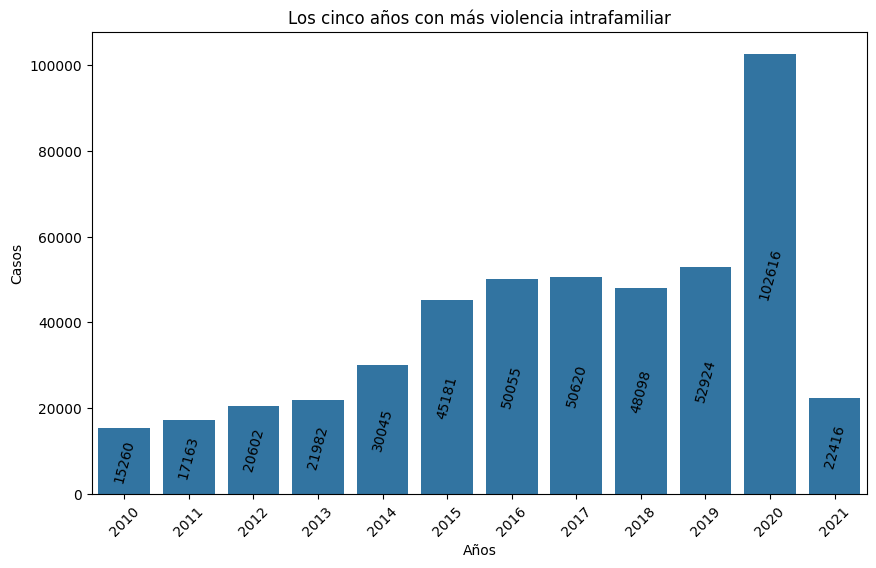

In [33]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x=casos_anyo.index, y=casos_anyo.values)
ax.bar_label(ax.containers[-1], fmt='%.0f', label_type='center', rotation=75)
plt.xticks(rotation=45)
plt.title("Los cinco años con más violencia intrafamiliar")
plt.xlabel("Años")
plt.ylabel("Casos")
plt.show()

*   ¿Victimas por genero?

In [34]:
casos_genero = df["GENERO"].value_counts().head(2)
casos_genero

GENERO
FEMENINO     366900
MASCULINO    109758
Name: count, dtype: int64

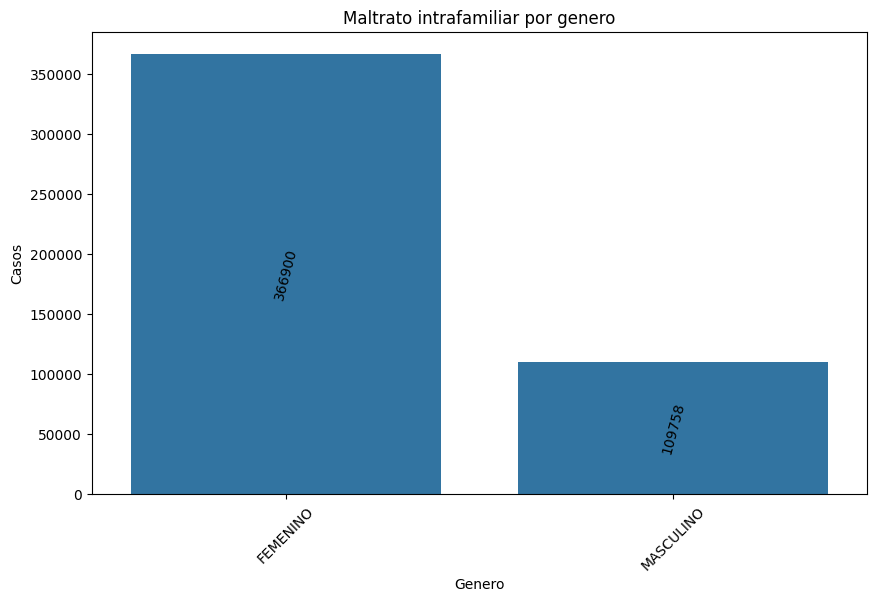

In [35]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x=casos_genero.index, y=casos_genero.values)
ax.bar_label(ax.containers[-1], fmt='%.0f', label_type='center', rotation=75)
plt.xticks(rotation=45)
plt.title("Maltrato intrafamiliar por genero")
plt.xlabel("Genero")
plt.ylabel("Casos")
plt.show()

In [36]:
df['FECHA HECHO']

0        2010-01-01
1        2010-01-01
2        2010-01-01
3        2010-01-01
4        2010-01-01
            ...    
476957   2021-01-05
476958   2021-01-14
476959   2021-03-26
476960   2021-03-27
476961   2021-04-15
Name: FECHA HECHO, Length: 476962, dtype: datetime64[ns]

In [37]:
df['DAY'] = df['FECHA HECHO'].dt.day_name()
df

,DEPARTAMENTO,MUNICIPIO,ARMAS MEDIOS,FECHA HECHO,GENERO,GRUPO ETARIO,CANTIDAD,Anyo,DAY
0,ATLÁNTICO,BARRANQUILLA (CT),ARMA BLANCA / CORTOPUNZANTE,2010-01-01,MASCULINO,ADULTOS,1,2010,Friday
1,BOYACÁ,DUITAMA,ARMA BLANCA / CORTOPUNZANTE,2010-01-01,FEMENINO,ADULTOS,1,2010,Friday
2,CAQUETÁ,PUERTO RICO,ARMA BLANCA / CORTOPUNZANTE,2010-01-01,MASCULINO,ADULTOS,1,2010,Friday
3,CASANARE,MANÍ,ARMA BLANCA / CORTOPUNZANTE,2010-01-01,FEMENINO,ADULTOS,1,2010,Friday
4,CUNDINAMARCA,BOGOTÁ D.C. (CT),ARMA BLANCA / CORTOPUNZANTE,2010-01-01,FEMENINO,ADULTOS,1,2010,Friday
...,...,...,...,...,...,...,...,...,...
476957,VICHADA,PUERTO CARREÑO (CT),SIN EMPLEO DE ARMAS,2021-01-05,FEMENINO,ADULTOS,1,2021,Tuesday
476958,VICHADA,PUERTO CARREÑO (CT),SIN EMPLEO DE ARMAS,2021-01-14,FEMENINO,ADULTOS,1,2021,Thursday
476959,VICHADA,PUERTO CARREÑO (CT),SIN EMPLEO DE ARMAS,2021-03-26,FEMENINO,ADULTOS,1,2021,Friday
476960,VICHADA,PUERTO CARREÑO (CT),SIN EMPLEO DE ARMAS,2021-03-27,FEMENINO,ADULTOS,1,2021,Saturday


In [38]:
casos_dia = df["DAY"].value_counts().head(7)
casos_dia

DAY
Sunday       88637
Monday       73579
Tuesday      65276
Saturday     65274
Wednesday    63821
Thursday     61356
Friday       59019
Name: count, dtype: int64

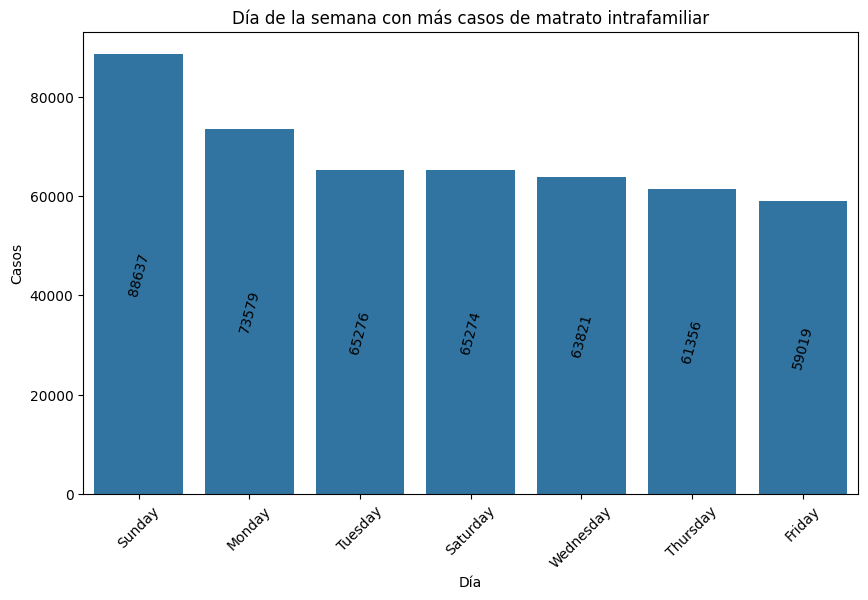

In [39]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x=casos_dia.index, y=casos_dia.values)
ax.bar_label(ax.containers[-1], fmt='%.0f', label_type='center', rotation=75)
plt.xticks(rotation=45)
plt.title("Día de la semana con más casos de matrato intrafamiliar")
plt.xlabel("Día")
plt.ylabel("Casos")
plt.show()

In [40]:
df_nuevo = df[["ARMAS MEDIOS", "DEPARTAMENTO"]]
df_nuevo

,ARMAS MEDIOS,DEPARTAMENTO
0,ARMA BLANCA / CORTOPUNZANTE,ATLÁNTICO
1,ARMA BLANCA / CORTOPUNZANTE,BOYACÁ
2,ARMA BLANCA / CORTOPUNZANTE,CAQUETÁ
3,ARMA BLANCA / CORTOPUNZANTE,CASANARE
4,ARMA BLANCA / CORTOPUNZANTE,CUNDINAMARCA
...,...,...
476957,SIN EMPLEO DE ARMAS,VICHADA
476958,SIN EMPLEO DE ARMAS,VICHADA
476959,SIN EMPLEO DE ARMAS,VICHADA
476960,SIN EMPLEO DE ARMAS,VICHADA


In [41]:
df_nuevo = df_nuevo[df_nuevo.DEPARTAMENTO.isin(["RISARALDA"])]
df_nuevo

,ARMAS MEDIOS,DEPARTAMENTO
72,CONTUNDENTES,RISARALDA
73,CONTUNDENTES,RISARALDA
74,CONTUNDENTES,RISARALDA
75,CONTUNDENTES,RISARALDA
144,CONTUNDENTES,RISARALDA
...,...,...
474457,SIN EMPLEO DE ARMAS,RISARALDA
474458,SIN EMPLEO DE ARMAS,RISARALDA
474459,SIN EMPLEO DE ARMAS,RISARALDA
474460,SIN EMPLEO DE ARMAS,RISARALDA


In [42]:
armas_risaralda = df_nuevo["ARMAS MEDIOS"].value_counts().sort_values(ascending=False).head(4)
armas_risaralda

ARMAS MEDIOS
CONTUNDENTES                   10075
SIN EMPLEO DE ARMAS             2322
NO REPORTA                      1015
ARMA BLANCA / CORTOPUNZANTE      826
Name: count, dtype: int64

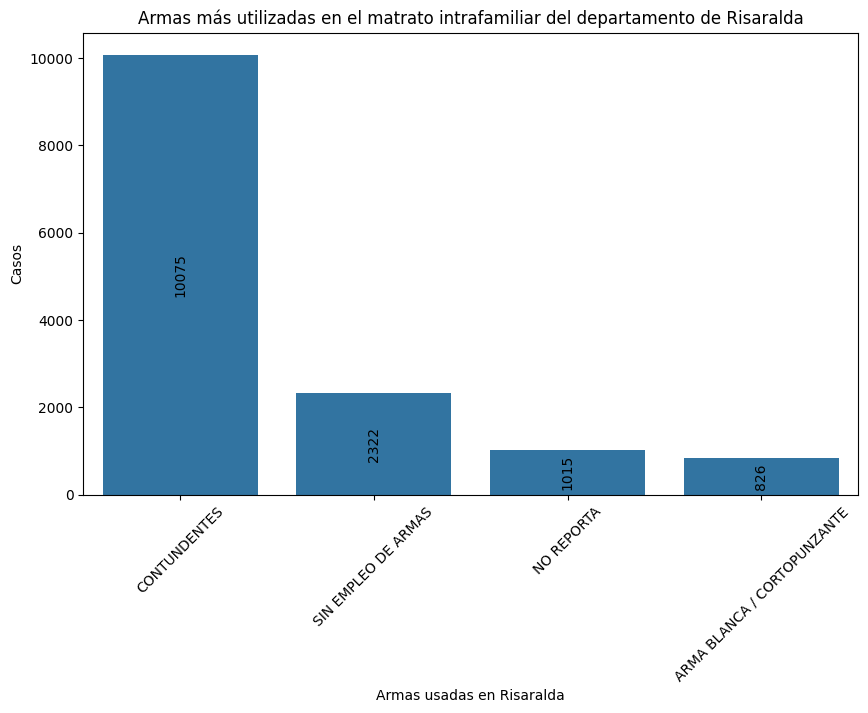

In [43]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x=armas_risaralda.index, y=armas_risaralda.values)
ax.bar_label(ax.containers[-1], fmt='%.0f', label_type='center', rotation=90)
plt.xticks(rotation=45)
plt.title("Armas más utilizadas en el matrato intrafamiliar del departamento de Risaralda")
plt.xlabel("Armas usadas en Risaralda")
plt.ylabel("Casos")
plt.show()

<ipython-input-44-385061047097>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


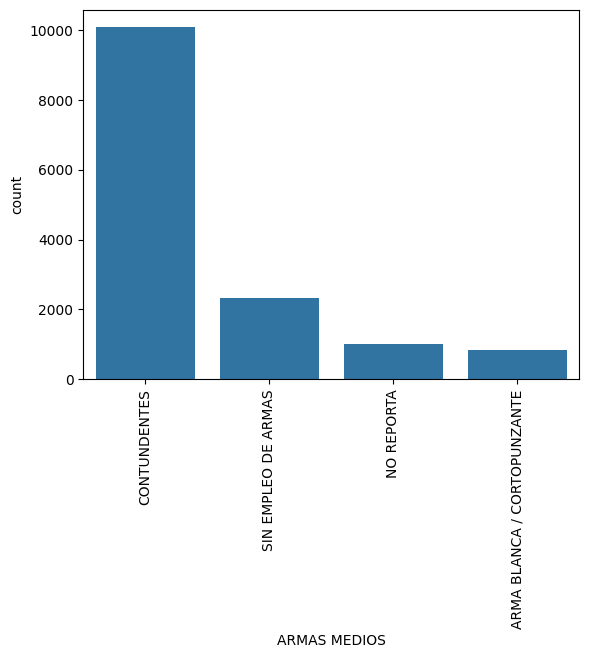

In [44]:
conteo_armas = df['ARMAS MEDIOS'].value_counts().sort_values(ascending=False).head(4)
ax = sns.countplot(x='ARMAS MEDIOS', data=df[df['DEPARTAMENTO'] == 'RISARALDA'], order=conteo_armas.index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()